# 第二章 基础二维图
## 2.7 玫瑰图及极坐标

In [31]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
import matplotlib.pyplot as plt
# 新增
import datetime
import os
import matplotlib.cm as cm #从内置colormap中取色

## 玫瑰图：mpl的logo

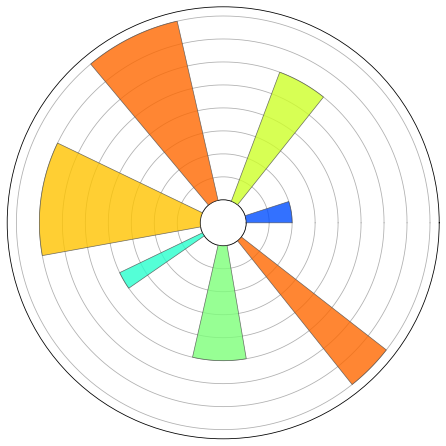

In [32]:

fig=plt.figure(figsize=(6,6))
ax=plt.subplot(1,1,1, projection='polar',frameon=True)
lw_bars=0.7

N = 7
arc = 2. * np.pi
theta = np.arange(0.0, arc, arc / N)
radii = np.array([2, 6, 8, 7, 4, 5, 8])
width = np.pi / 4 * np.array([0.4, 0.4, 0.6, 0.8, 0.2, 0.5, 0.3])
bars = ax.bar(theta, radii, width=width, bottom=0.0, align='edge',
              edgecolor='0.3', lw=lw_bars,zorder=5,alpha=0.8)
for r, bar in zip(radii, bars):
    color = *cm.jet(r / 10.)[:3], 0.6  # color from jet with alpha=0.6
    bar.set_facecolor(color)
ax.set_xlim(0,np.pi*2)
ax.xaxis.set_major_locator(MultipleLocator(45/180*np.pi))
ax.xaxis.set_ticks([])
# ax.yaxis.set_ticks([])
ax.yaxis.set_ticklabels([])

ax.set_rorigin(-1)

# savefig
plt.tight_layout(pad=0)
figname='../../figures/Chapter2/Lecture2_7_basic_1.pdf'
plt.savefig(figname,bbox_inches='tight')
os.system('pdfcrop '+figname+' '+figname)
plt.show()

## 案例1：极坐标的坐标轴相关设置

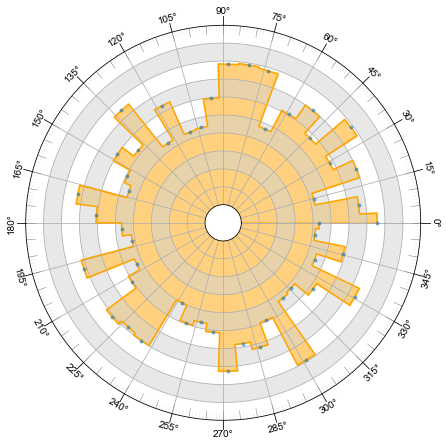

In [55]:
def xtick_gen(ax,locator_deg,thick=0.9,color='k',**kwargs):
    for tick in np.arange(ax.get_xlim()[0],ax.get_xlim()[1],np.deg2rad(locator_deg)):
        ax.plot([tick,tick],[ax.get_rmax(), ax.get_rmax()*thick],color=color,**kwargs)
def ytick_gen(ax,locator,thick=0.9,color='k',**kwargs):
    ax.yaxis.set_major_locator(MultipleLocator(locator))
    ticks=ax.yaxis.get_ticklocs() # minor=True
    for tick in ticks:
        ax.plot([0,np.deg2rad(5)],[tick,tick],color=color,**kwargs)
def reset_xticklabels(ax,mod=1,strict=False):
    # 首先执行一次绘制，使xticklabels文字生效
    plt.gcf().canvas.draw()
    # 获取xticklabels然后重新绘制标签文字，极坐标系的标签文字无法旋转
    xlabels=ax.xaxis.get_ticklabels()
    xticks=ax.get_xticks()
    # 减去基准角度
    xticks=ax.get_xticks()-ax.get_theta_offset()
    # 保证角度在[0, 2pi]之间
    if(strict):
        xticks[xticks<0]=xticks[xticks<0]+2*np.pi
        xticks[xticks>2*np.pi]=xticks[xticks>2*np.pi]-2*np.pi
    for label,tick in zip(xlabels, xticks):
        angle=np.rad2deg(tick)
        if((angle<0) or (angle>=360)):
            continue
        x,y=label.get_position()
        text=label.get_text()
        lab=ax.text(x,y,text,color=label.get_color(),ha='center',va='center',fontsize=label.get_fontsize(), transform=label.get_transform())
        if(mod==1):
            angle=angle-90 if(angle<180) else angle-90+180
        elif(mod==2):
            angle=angle if((angle<90) or (angle>270)) else angle+180 # option 1
        else:
            angle=angle-90 if(angle<180) else angle-90+180
        lab.set_rotation(angle)
    ax.xaxis.set_ticklabels([])
def reset_yticklabels(ax):
    # 首先执行一次绘制，使xticklabels文字生效
    plt.gcf().canvas.draw()
    # 获取xticklabels然后重新绘制标签文字，极坐标系的标签文字无法旋转
    labels=ax.yaxis.get_ticklabels()
    ticks=ax.get_yticks()
    for label,tick in zip(labels, ticks):
        x,y=label.get_position()
        text=label.get_text()
        lab=ax.text(x,y,text,color='g',ha='center',va='center',fontsize=label.get_fontsize(), transform=label.get_transform())
    ax.yaxis.set_ticklabels([])
    
fig=plt.figure(figsize=(6,6))
ax=plt.subplot(1,1,1, projection='polar',frameon=True)

ax.set_thetalim(0,2*np.pi) #等价于ax.set_xlim(0,np.pi)，单位为弧度
ax.set_rlim(1,999)
ax.set_rorigin(-100)

# 设置刻度间隔
ax.xaxis.set_major_locator(MultipleLocator(np.deg2rad(15)))
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_ticklabels([])
reset_xticklabels(ax)

# 重置刻度
# major
xtick_gen(ax,15,color='k',lw=0.8,thick=1.05,clip_on=False)
xtick_gen(ax,5,color='gray',lw=0.5,thick=0.95)
# minor
xtick_gen(ax,1,color='gray',lw=0.1,thick=0.97)

ax.bar(0,100,bottom=800,width=np.pi*2, color='lightgray',alpha=0.5)
ax.bar(0,100,bottom=600,width=np.pi*2, color='lightgray',alpha=0.5)
ax.bar(0,100,bottom=400,width=np.pi*2, color='lightgray',alpha=0.5)
ax.bar(0,100,bottom=200,width=np.pi*2, color='lightgray',alpha=0.5)

# random data
y = np.random.rand(50)*400+400
x=np.linspace(0,2*np.pi,len(y))
ax.scatter(x,y,zorder=5,alpha=0.5,marker='.')
ax.fill_between(x,y, step='mid',color='orange',alpha=0.5)
ax.step(x,y,where='mid',color='orange')

# savefig
plt.tight_layout(pad=0)
figname='../../figures/Chapter2/Lecture2_7_basic_2_6.pdf'
plt.savefig(figname,bbox_inches='tight')
os.system('pdfcrop '+figname+' '+figname)
plt.show()

## 案例2：

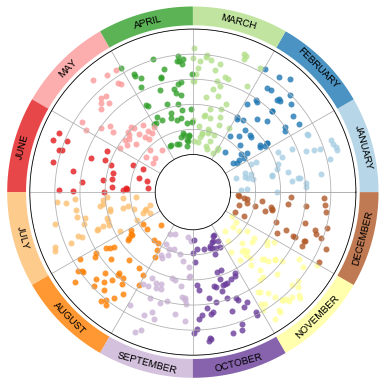

In [59]:
# 创建极坐标轴并进行范围设置
fig=plt.figure(figsize=(6,6))
ax=plt.subplot(1,1,1, projection='polar',frameon=True)

ymax=1000
ymin=0
yorigin=-300
ax.set_thetalim(0,2*np.pi) #等价于ax.set_xlim(0,np.pi)，单位为弧度
ax.set_rlim(ymin,ymax)
ax.set_rorigin(yorigin)
# 设置辐条间隔为30度
ax.xaxis.set_major_locator(MultipleLocator(np.deg2rad(360/12)))
# 取消ticklabels
ax.yaxis.set_ticklabels([])
ax.xaxis.set_ticklabels([])
# plot
colors_month = plt.get_cmap('Paired')(np.linspace(0,1, 12))
x,y = np.random.rand(2,500)
x=np.array(2*np.pi*x,float)
y=np.array(y*(ymax-ymin-50)*0.9+50,float)
for month in range(1,13):
    color=colors_month[month-1]
    month_str = datetime.date(1900, month, 1).strftime('%B')
    x_rad=np.deg2rad(month*30-15)
    br=ax.bar(x_rad,150,bottom=ymax+30,width=np.deg2rad(30),color=color, clip_on=False,alpha=0.8)
    # label of month name
    month_str = datetime.date(1900, month, 1).strftime('%B')
    angle=np.rad2deg(x_rad)
    ax.text(x_rad,br[0].xy[1]+br[0].get_height()/2,month_str.upper(),va='center',ha='center',rotation=angle-90 if(angle<180) else angle-90+180)
    # scatter
    ind=((x>=np.deg2rad(month*30-30)) & (x<np.deg2rad(month*30)))
    ax.scatter(x[ind],y[ind],facecolor=color,alpha=0.8,linewidth=0)

# savefig
figname='../../figures/Chapter2/Lecture2_7_basic_3_3.pdf'
plt.savefig(figname,bbox_inches='tight')
os.system('pdfcrop '+figname+' '+figname)
plt.show()

## 雷达图

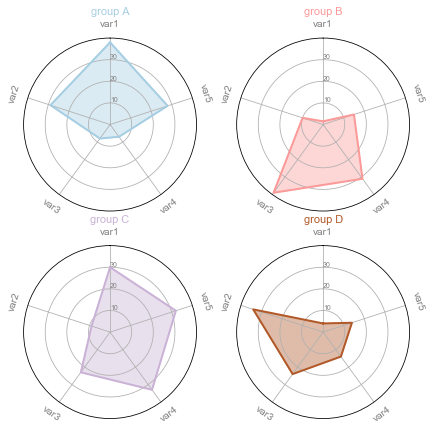

In [71]:

df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
def make_spider( row, title, color):
    categories=list(df)[1:]
    N = len(categories)
    
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    ax=plt.subplot(2,2,row+1, projection='polar',frameon=True)
    ax.set_theta_offset(np.pi / 2)
    plt.xticks(angles[:-1], categories, color='grey')
    reset_xticklabels(ax,strict=True)
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    plt.title(title, size=11, color=color, y=1.1)

# 创建极坐标轴并进行范围设置
fig=plt.figure(figsize=(7,7), facecolor='w')

# Create a color palette:
my_palette = plt.cm.get_cmap("Paired", len(df.index))

for row in range(0, len(df.index)):
    make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))
    
# savefig
figname='../../figures/Chapter2/Lecture2_7_case_3_3.pdf'
plt.savefig(figname,bbox_inches='tight')
os.system('pdfcrop '+figname+' '+figname)
plt.show()

## 彩虹条带

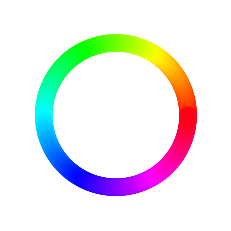

In [72]:
xval = np.arange(0, 2*np.pi, 0.01)
yval = np.ones_like(xval)

colormap = plt.get_cmap('hsv')
norm = mpl.colors.Normalize(0.0, 2*np.pi)

ax = plt.subplot(1, 1, 1, polar=True)
ax.scatter(xval, yval, c=xval, s=300, cmap=colormap, norm=norm, linewidths=0)
ax.set_yticks([])
plt.axis('off')
# savefig
figname='../../figures/Chapter2/Lecture2_7_case_4.pdf'
plt.savefig(figname,bbox_inches='tight')
os.system('pdfcrop '+figname+' '+figname)
plt.show()